<a href="https://colab.research.google.com/github/Sourove-331/Apurba/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
import os

In [39]:
main_directory = '/content/drive/MyDrive/Apurba/Mini_Dataset'
train_directory = os.path.join(main_directory, 'Mini_Dataset')
validation_directory = os.path.join(main_directory, 'Mini_Dataset')

train_East_Asian_dir = os.path.join(train_directory, 'East_Asian')
train_Indian_dir = os.path.join(train_directory, 'Indian')
train_Southeast_Asian_dir = os.path.join(train_directory, 'Southeast_Asian')


validation_East_Asian_dir = os.path.join(validation_directory, 'East_Asian')
validation_Indian_dir = os.path.join(validation_directory, 'Indian')
validation_Southeast_Asian_dir = os.path.join(validation_directory, 'Southeast_Asian')

In [40]:
train_East_Asian_fnames = os.listdir(train_East_Asian_dir)
train_East_Asian_fnames.sort()
print(train_East_Asian_fnames[:10])

['1.jpg', '100.jpg', '1005.jpg', '1009.jpg', '1011.jpg', '1013.jpg', '1015.jpg', '1021.jpg', '1026.jpg', '1028.jpg']


In [41]:
train_Indian_fnames = os.listdir(train_Indian_dir)
train_Indian_fnames.sort()
print(train_Indian_fnames[:10])

['1008.jpg', '101.jpg', '1010.jpg', '1022.jpg', '103.jpg', '1034.jpg', '1038.jpg', '104.jpg', '1045.jpg', '1046.jpg']


In [42]:
train_Southeast_Asian_fnames = os.listdir(train_Southeast_Asian_dir)
train_Southeast_Asian_fnames.sort()
print(train_Southeast_Asian_fnames[:10])

['1027.jpg', '1030.jpg', '1039.jpg', '1042.jpg', '1052.jpg', '1057.jpg', '1065.jpg', '1069.jpg', '1083.jpg', '1111.jpg']


In [43]:
print('total training East Asian images:', len(os.listdir(train_East_Asian_dir)))
print('total training Indian images:', len(os.listdir(train_Indian_dir)))
print('total training Southeast Asian images:', len(os.listdir(train_Southeast_Asian_dir)))
print('total validation East Asian images:', len(os.listdir(validation_East_Asian_dir)))
print('total validation Indian images:', len(os.listdir(validation_Indian_dir)))
print('total validation Southeast Asian images:', len(os.listdir(validation_Southeast_Asian_dir)))

total training East Asian images: 1000
total training Indian images: 1000
total training Southeast Asian images: 1000
total validation East Asian images: 1000
total validation Indian images: 1000
total validation Southeast Asian images: 1000


In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
numbers_rows = 6
numbers_cols = 6


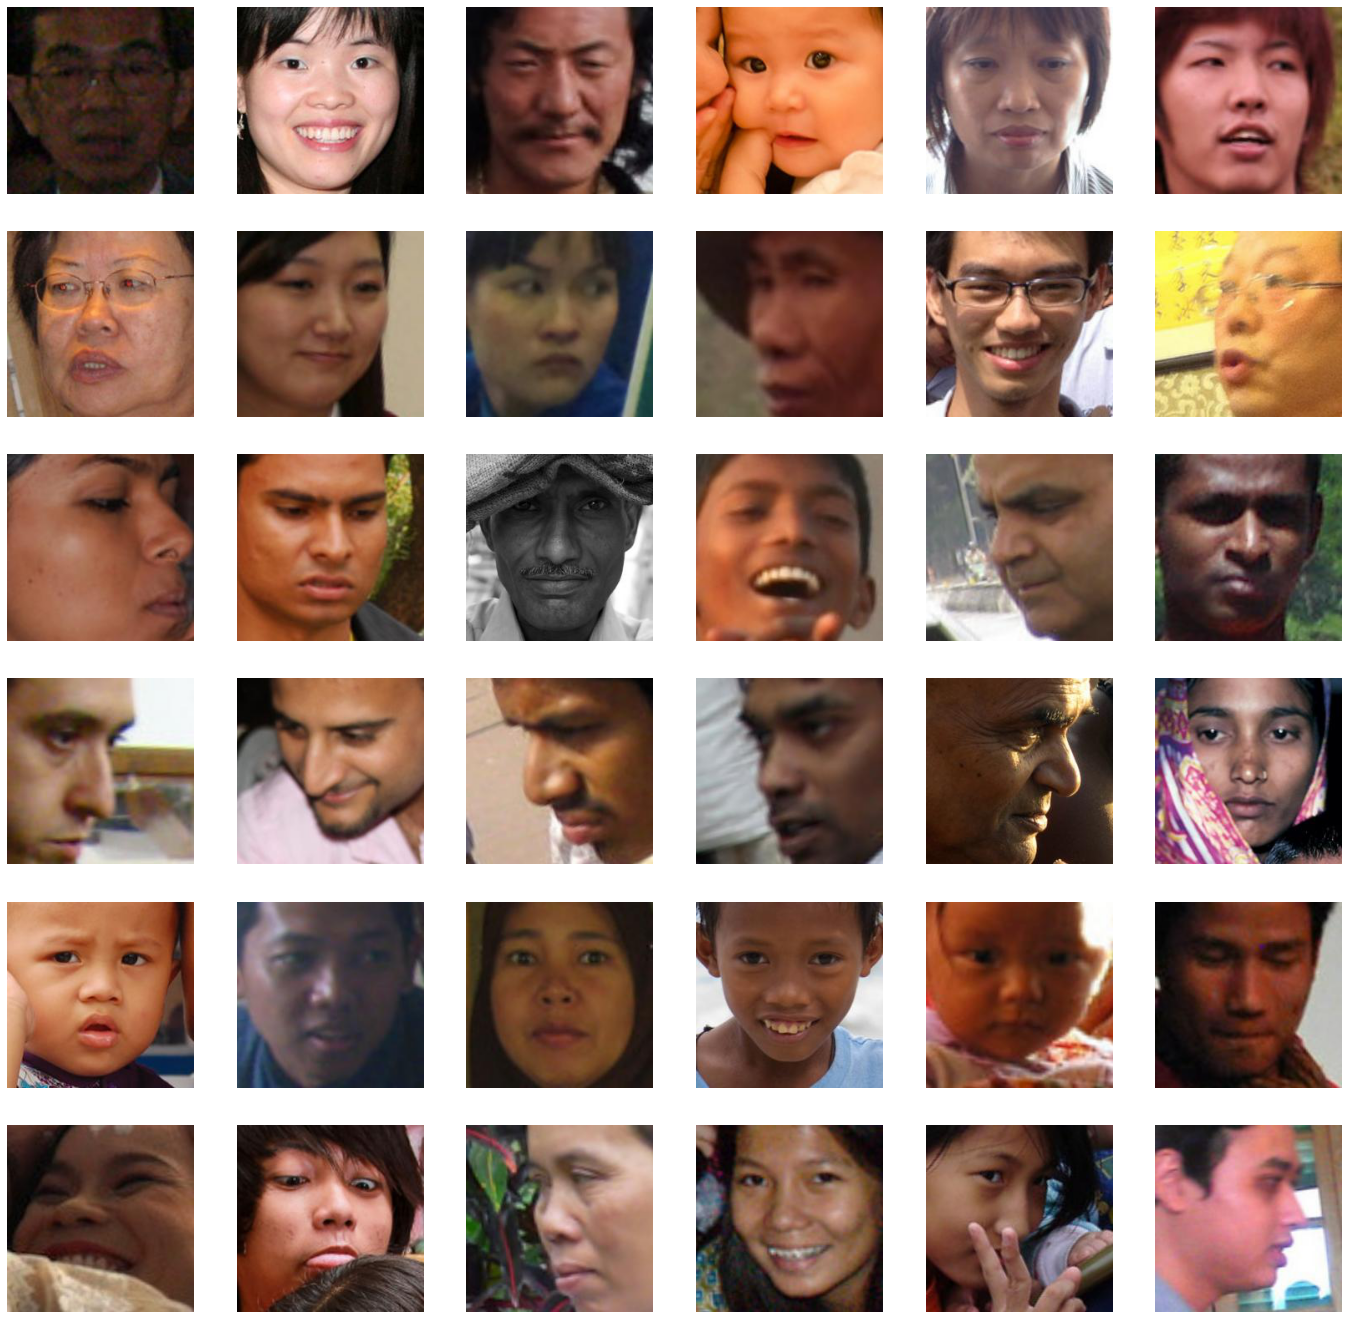

In [45]:
fi = plt.gcf()
fi.set_size_inches(numbers_cols * 4, numbers_rows * 4)

# pic_index += 8
East_Asian_pix = [os.path.join(train_East_Asian_dir, fname) 
                for fname in train_East_Asian_fnames[0:12]]
Indian_pix = [os.path.join(train_Indian_dir, fname) 
                for fname in train_Indian_fnames[0:12]]
Southeast_Asian_pix = [os.path.join(train_Southeast_Asian_dir, fname) 
                for fname in train_Southeast_Asian_fnames[0:12]]

for j, image_path in enumerate(East_Asian_pix + Indian_pix + Southeast_Asian_pix):
  sp = plt.subplot(numbers_rows, numbers_cols, j + 1)
  sp.axis('Off')
  image = mpimg.imread(image_path)
  plt.imshow(image)

plt.show()


In [46]:
image_input = tf.keras.layers.Input(shape=(224, 224, 3))

y = tf.keras.layers.Conv2D(16, 3, activation='relu')(image_input)
y = tf.keras.layers.MaxPooling2D(2)(y)
y = tf.keras.layers.Conv2D(32, 3, activation='relu')(y)
y = tf.keras.layers.MaxPooling2D(2)(y)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(y)
x = tf.keras.layers.MaxPooling2D(2)(y)

In [47]:
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dense(1024, activation='relu')(y)
output = tf.keras.layers.Dense(1, activation='sigmoid')(y)
model = tf.keras.Model(image_input, output)

In [48]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0   

In [49]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_directory,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [52]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=32,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15


InvalidArgumentError: ignored

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.Model(image_input, successive_outputs)


East_Asian_img_files = [os.path.join(train_East_Asian_dir, f) for f in train_East_Asian_fnames]
Indian_img_files = [os.path.join(train_Indian_dir, f) for f in train_Indian_fnames]
Southeast_Asian_img_files = [os.path.join(train_Southeast_Asian_dir, f) for f in train_Southeast_Asian_fnames]
img_path = random.choice(East_Asian_img_files + Indian_img_files + Southeast_Asian_img_files)

image = load_img(img_path, target_size=(224, 224)) 
y = img_to_array(image)
y = y.reshape((1,) + x.shape)  

y /= 255

successive_feature_maps = visualization_model.predict(y)


layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    nth_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * nth_features))
    for i in range(nth_features):
      y = feature_map[0, :, :, i]
      y -= y.mean()
      y /= y.std()
      y *= 64
      y += 128
      y = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / nth_features
    plt.figure(figsize=(scale * nth_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')